# Центральная предельная теорема своими руками

1. Выбрать любимое распределение
2. Сгенерировать выборку 1000
3. Построить гистограмму выборки
4. Нарисовать сверху гистограммы теоретическую плотность распределения случайной величины

Ваша задача:
оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок

Для этого: 
1. n = 5, 10, 50 
2. Сгенерировать 1000 выборок объёма n 
3. Построить гистограммы распределений их выборочных средних
4. Используя информацию о среднем и дисперсии исходного распределения, посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних
5. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [46]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

In [48]:
mu = 2.0
sigma = 0.5

# Первая часть задания
Рисуем гистограмму выбранного распределения и теоретическую плотность для сгенерированных значений

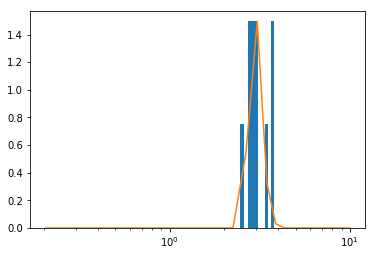

In [49]:
n = 10

sample = lognorm.rvs(sigma, loc=mu, scale=1, size=n)
shape = lognorm.fit(sample)[0]

# Гистограмма
ax = plt.subplot(111)
ax.hist(sample, bins = 10, normed=True)
ax.set_xscale("log")

# Теоретическая плотность распределения
x = np.linspace(-10, 10, 50)
pdf = lognorm.pdf(x, shape, loc=mu, scale=1)
ax.plot(x, pdf)
plt.show()

# Вторая часть задания
Рисуем гистограмму выборочных средних и приближение нормального распределения

https://en.wikipedia.org/wiki/Log-normal_distribution
про моё распределение 

$$\mu = \exp{(\mu + \frac{\sigma^2}{2})}$$
$$var = \exp{(2\mu + \sigma^2})  (\exp{\sigma^2 - 1)}$$
$$E[x^2] = \exp{(2\mu + 2\sigma^2)}$$
$$\sigma^2 = \log{(1 + \frac{var}{E[x^2]})}$$

In [125]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm
import random

In [127]:
def make_sample(n, mu, sigma):
    data = lognorm.rvs(sigma, loc=mu, scale=1, size=n)
    sample = []
    for i in range(1000):
        data = lognorm.rvs(sigma, loc=mu, scale=1, size=n)
        sample.append(sum(data)/len(data)) #получаем выборочное среднее- т.е. просто ср. арифм.
    return sorted(sample)

In [128]:
def parametres(mu, sigma, n):
    m = np.exp(mu + sigma**2.0 / 2.0)
    D_x = (np.exp(sigma**2) - 1)(np.exp(2*mu + sigma**2))
    s = np.sqrt(D_x)
    return m, s

In [129]:
def plot(n):
    mu = 2.0
    sigma = 0.5

    sample = make_sample(n, mu, sigma)
    # print(sample)

    mu = np.mean(sample)
    s_0 = sigma/np.sqrt(n)

    norm_rv = norm(mu, s_0) #сделаем нормальное распределение по найденным параметрам
    sample_rv = norm_rv.rvs(1000)

    ax = plt.subplot(111)
    ax.hist(sample, normed=True)
    ax.set_xscale("log")

    x = np.logspace(-10, 10, 100)
    pdf = norm_rv.pdf(x)
    ax.plot(x, pdf, 'r')

    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

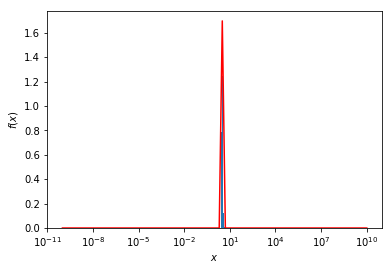

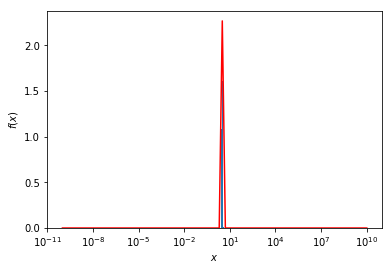

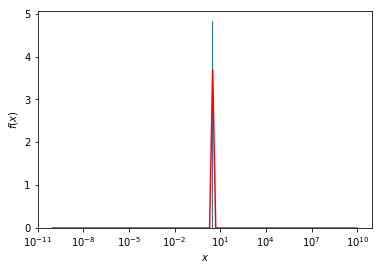

In [130]:
plot(5)
plot(10)
plot(50)